<a href="https://colab.research.google.com/github/Ileshgattu/data-science-assignments/blob/main/ASSIGNMENT1_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q1).Use Random Forest to prepare a model on fraud data
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Data Description :

# Undergrad : person is under graduated or not
# Marital.Status : marital status of a person
# Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
# Work Experience : Work experience of an individual person
# Urban : Whether that person belongs to urban area or not

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check (2).csv to Fraud_check (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: >

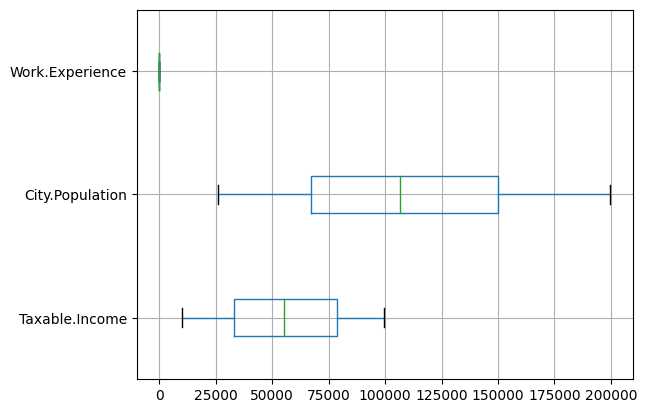

In [ ]:
df.boxplot(vert=False)

In [ ]:
df['Taxable.Income'] = pd.cut(x=df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'],right=False)
Y = df['Taxable.Income']
Y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [ ]:
X = df.drop('Taxable.Income',axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X['Undergrad'] = LE.fit_transform(X['Undergrad'])
X['Marital.Status'] = LE.fit_transform(X['Marital.Status'])
X['Urban'] = LE.fit_transform(X['Urban'])
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((420, 5), (180, 5), (420,), (180,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)
print('Number of nodes is',DTC.tree_.node_count)
print('Maximum depth is',DTC.tree_.max_depth)
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Number of nodes is 241
Maximum depth is 21
Training score is 1.0
Test score is 0.6555555555555556


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTC = DecisionTreeClassifier(max_depth=10)
DTC.fit(X_train,Y_train)
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)
print('Number of nodes is',DTC.tree_.node_count)
print('Maximum depth is',DTC.tree_.max_depth)
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Number of nodes is 165
Maximum depth is 10
Training score is 0.9261904761904762
Test score is 0.6833333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8)
DTC.fit(X_train,Y_train)
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)
print('Number of nodes is',DTC.tree_.node_count)
print('Maximum depth is',DTC.tree_.max_depth)
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Number of nodes is 99
Maximum depth is 8
Training score is 0.8857142857142857
Test score is 0.7222222222222222


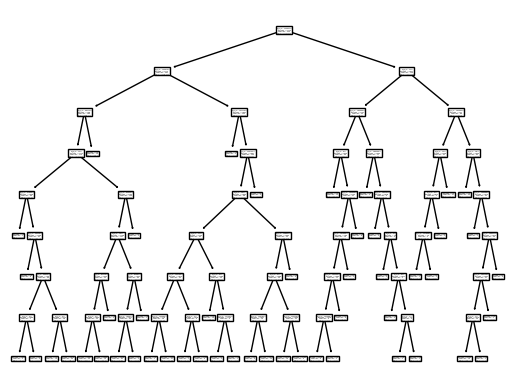

In [ ]:
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
plt.show(tree.plot_tree(DTC))

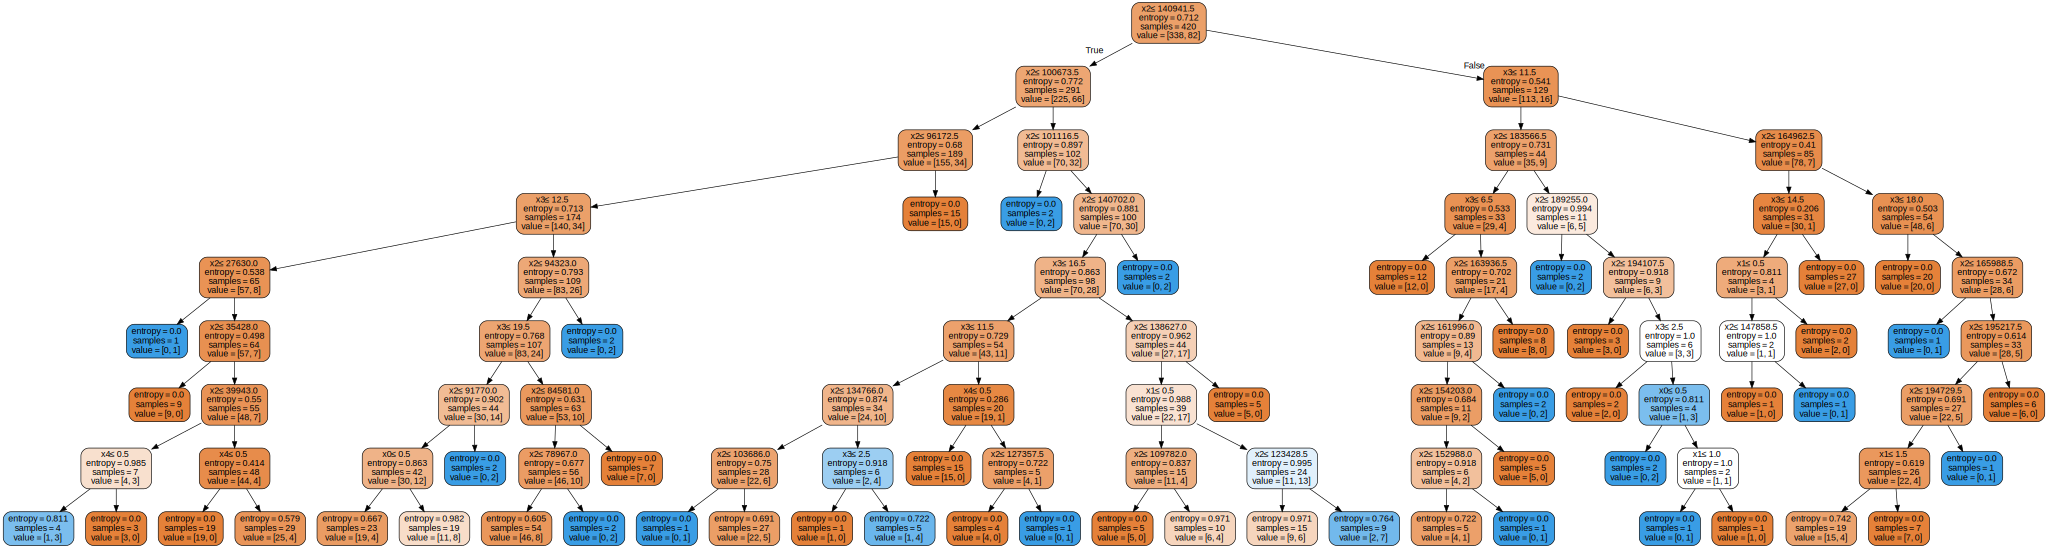

In [ ]:
dot_data = tree.export_graphviz(DTC,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

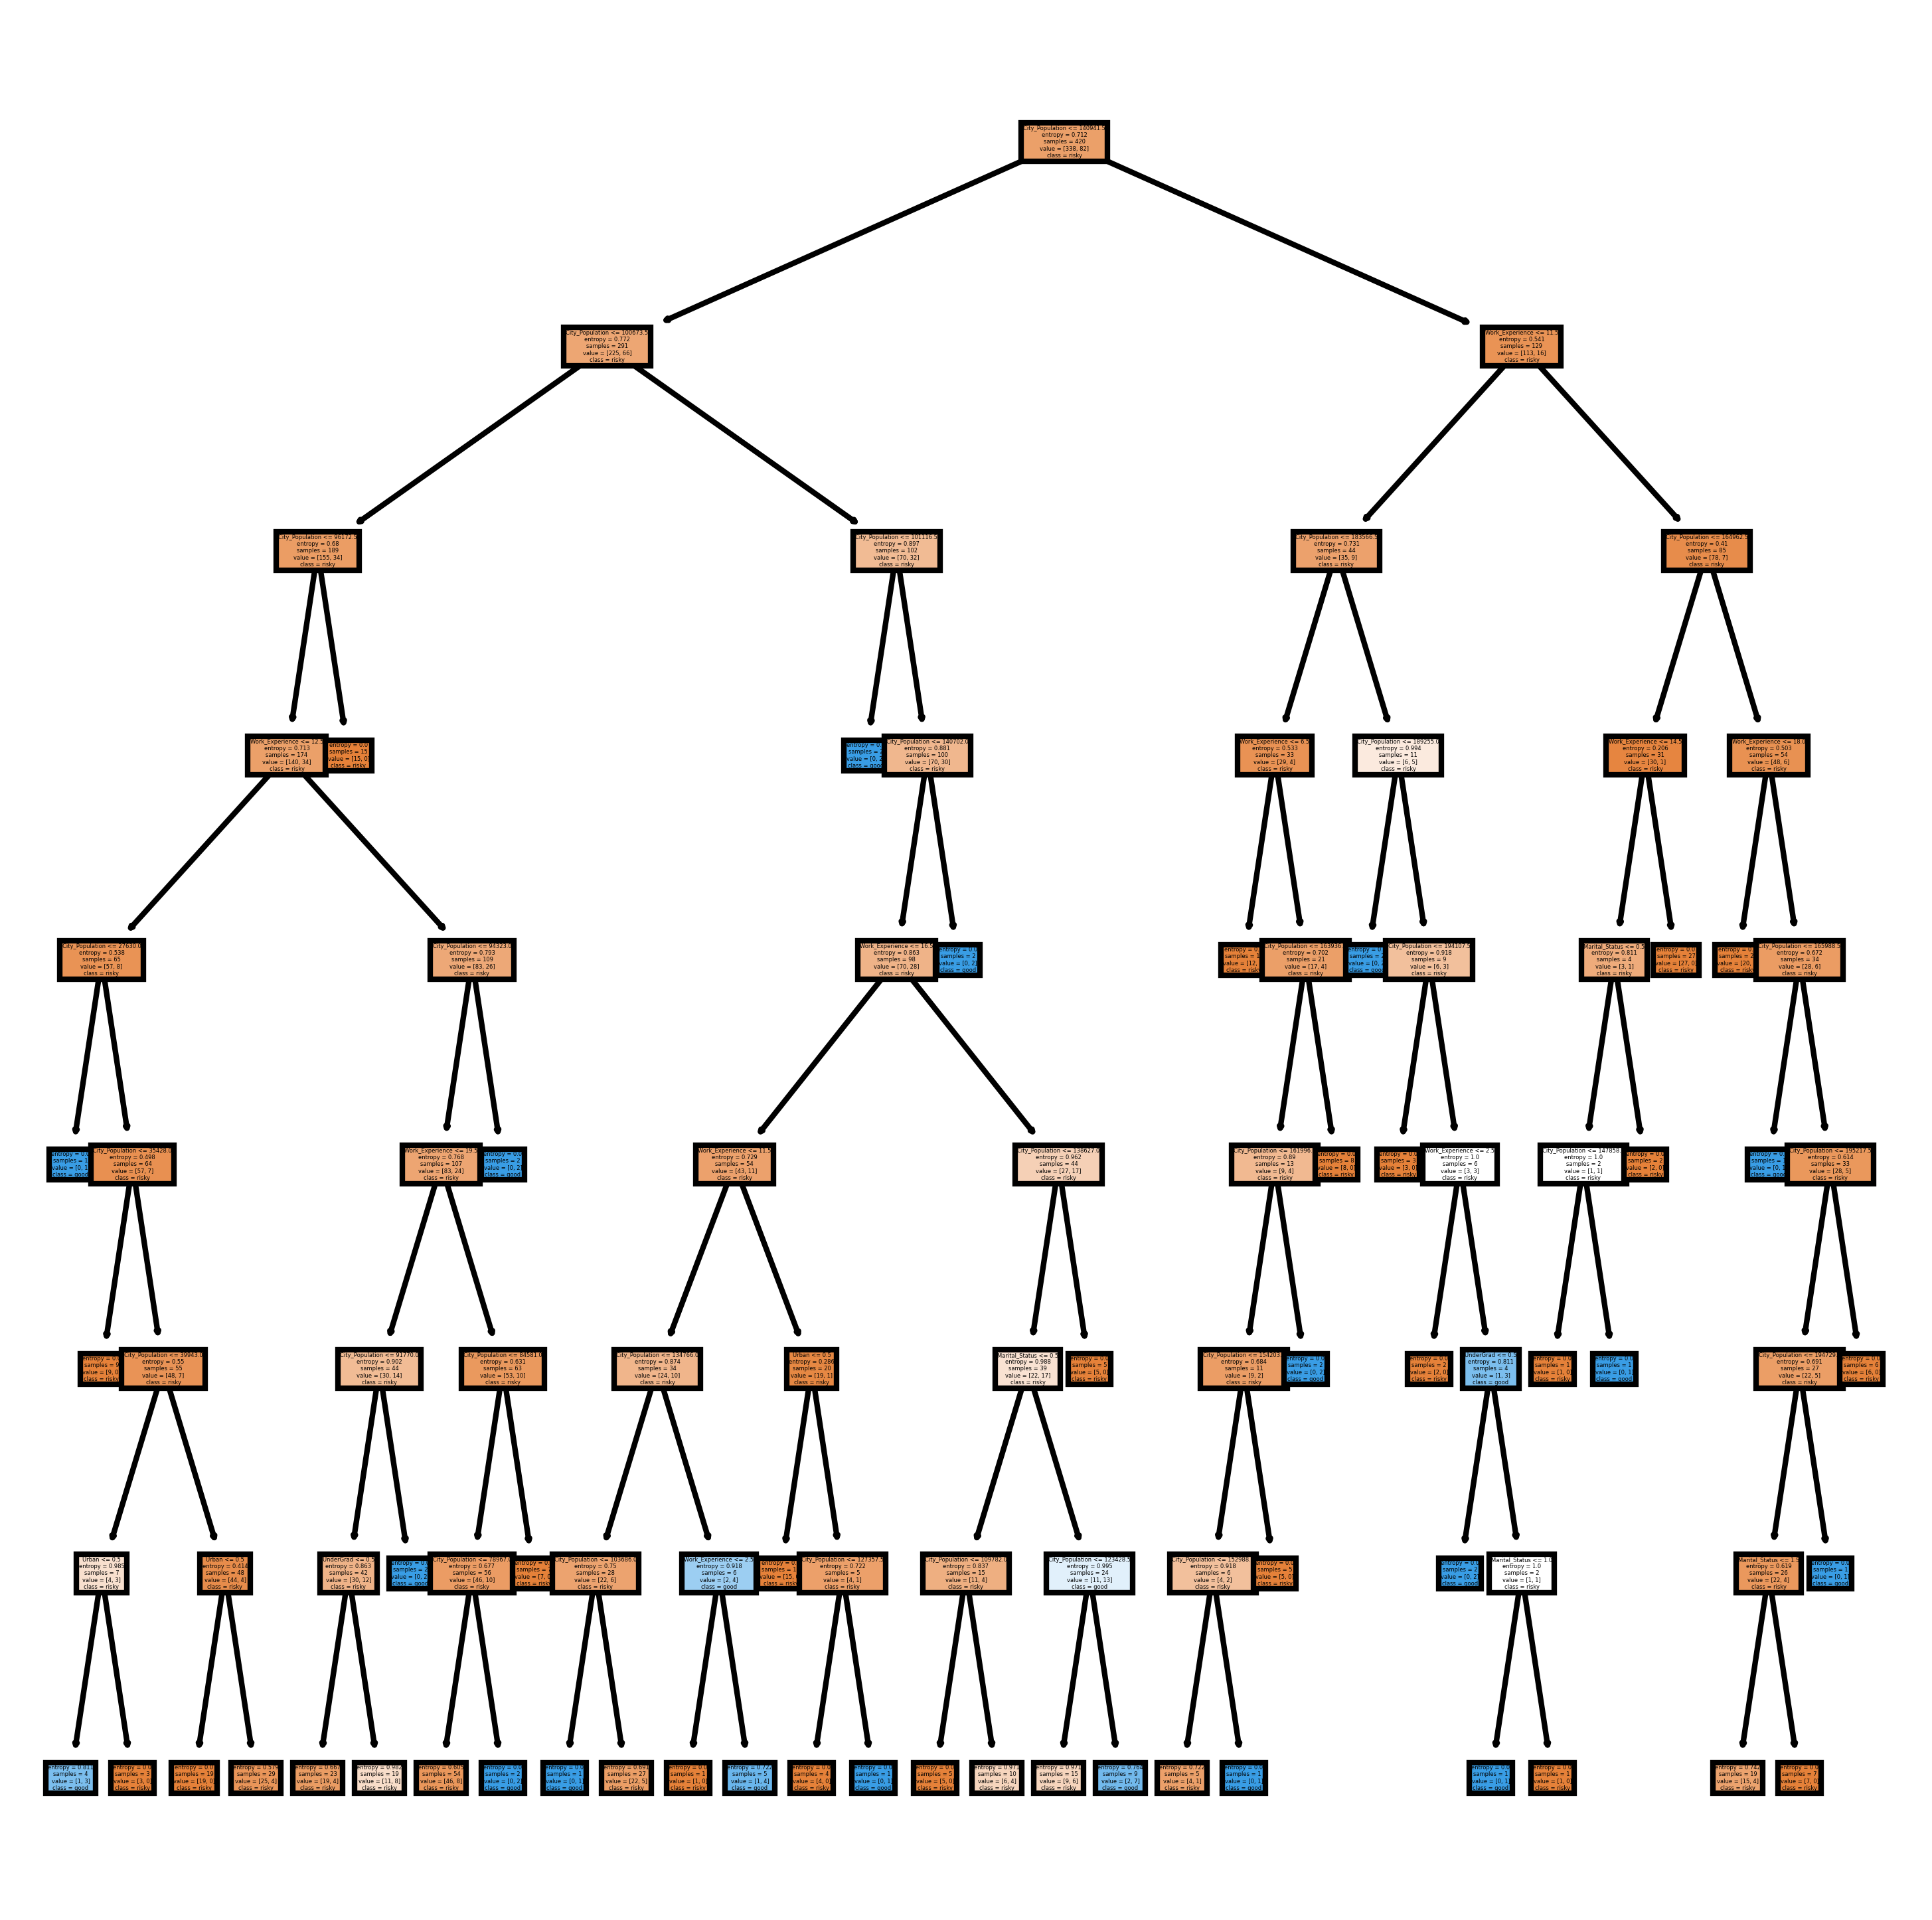

In [ ]:
fn = ['UnderGrad','Marital_Status', 'City_Population','Work_Experience','Urban','Taxable_category']
cn = ['risky','good']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
tree.plot_tree(DTC,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT = DecisionTreeClassifier(criterion='gini',max_depth=10)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
print('Number of nodes is',DT.tree_.node_count)
print('Maximum depth is',DT.tree_.max_depth)
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Number of nodes is 161
Maximum depth is 10
Training score is 0.9285714285714286
Test score is 0.6944444444444444


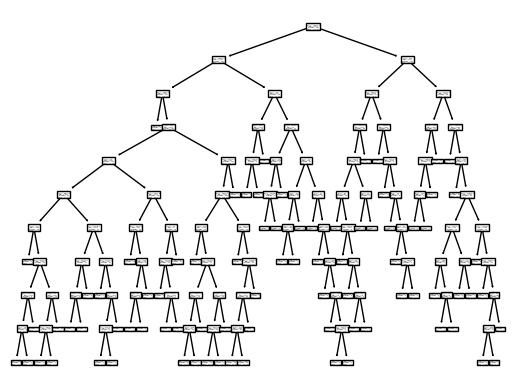

In [ ]:
plt.show(tree.plot_tree(DT))

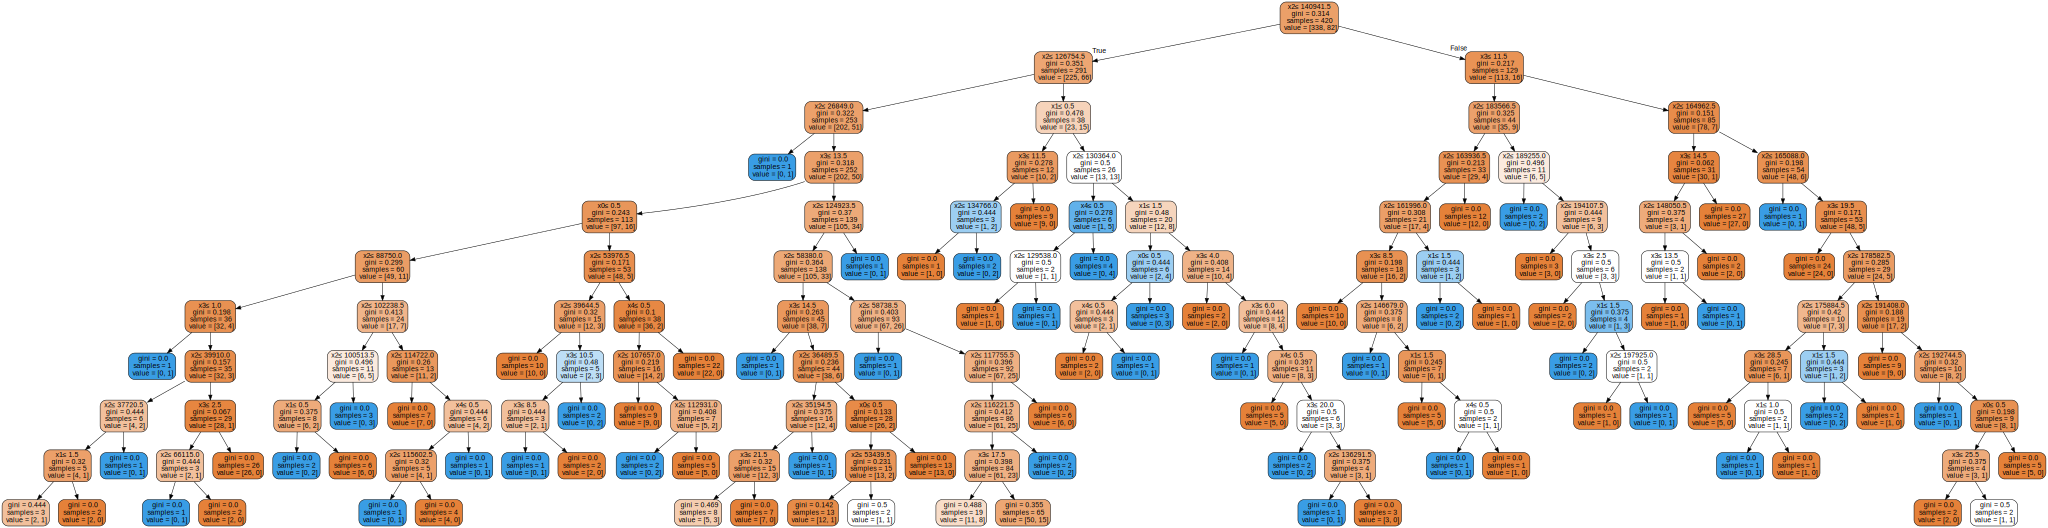

In [ ]:
dot_data = tree.export_graphviz(DT,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

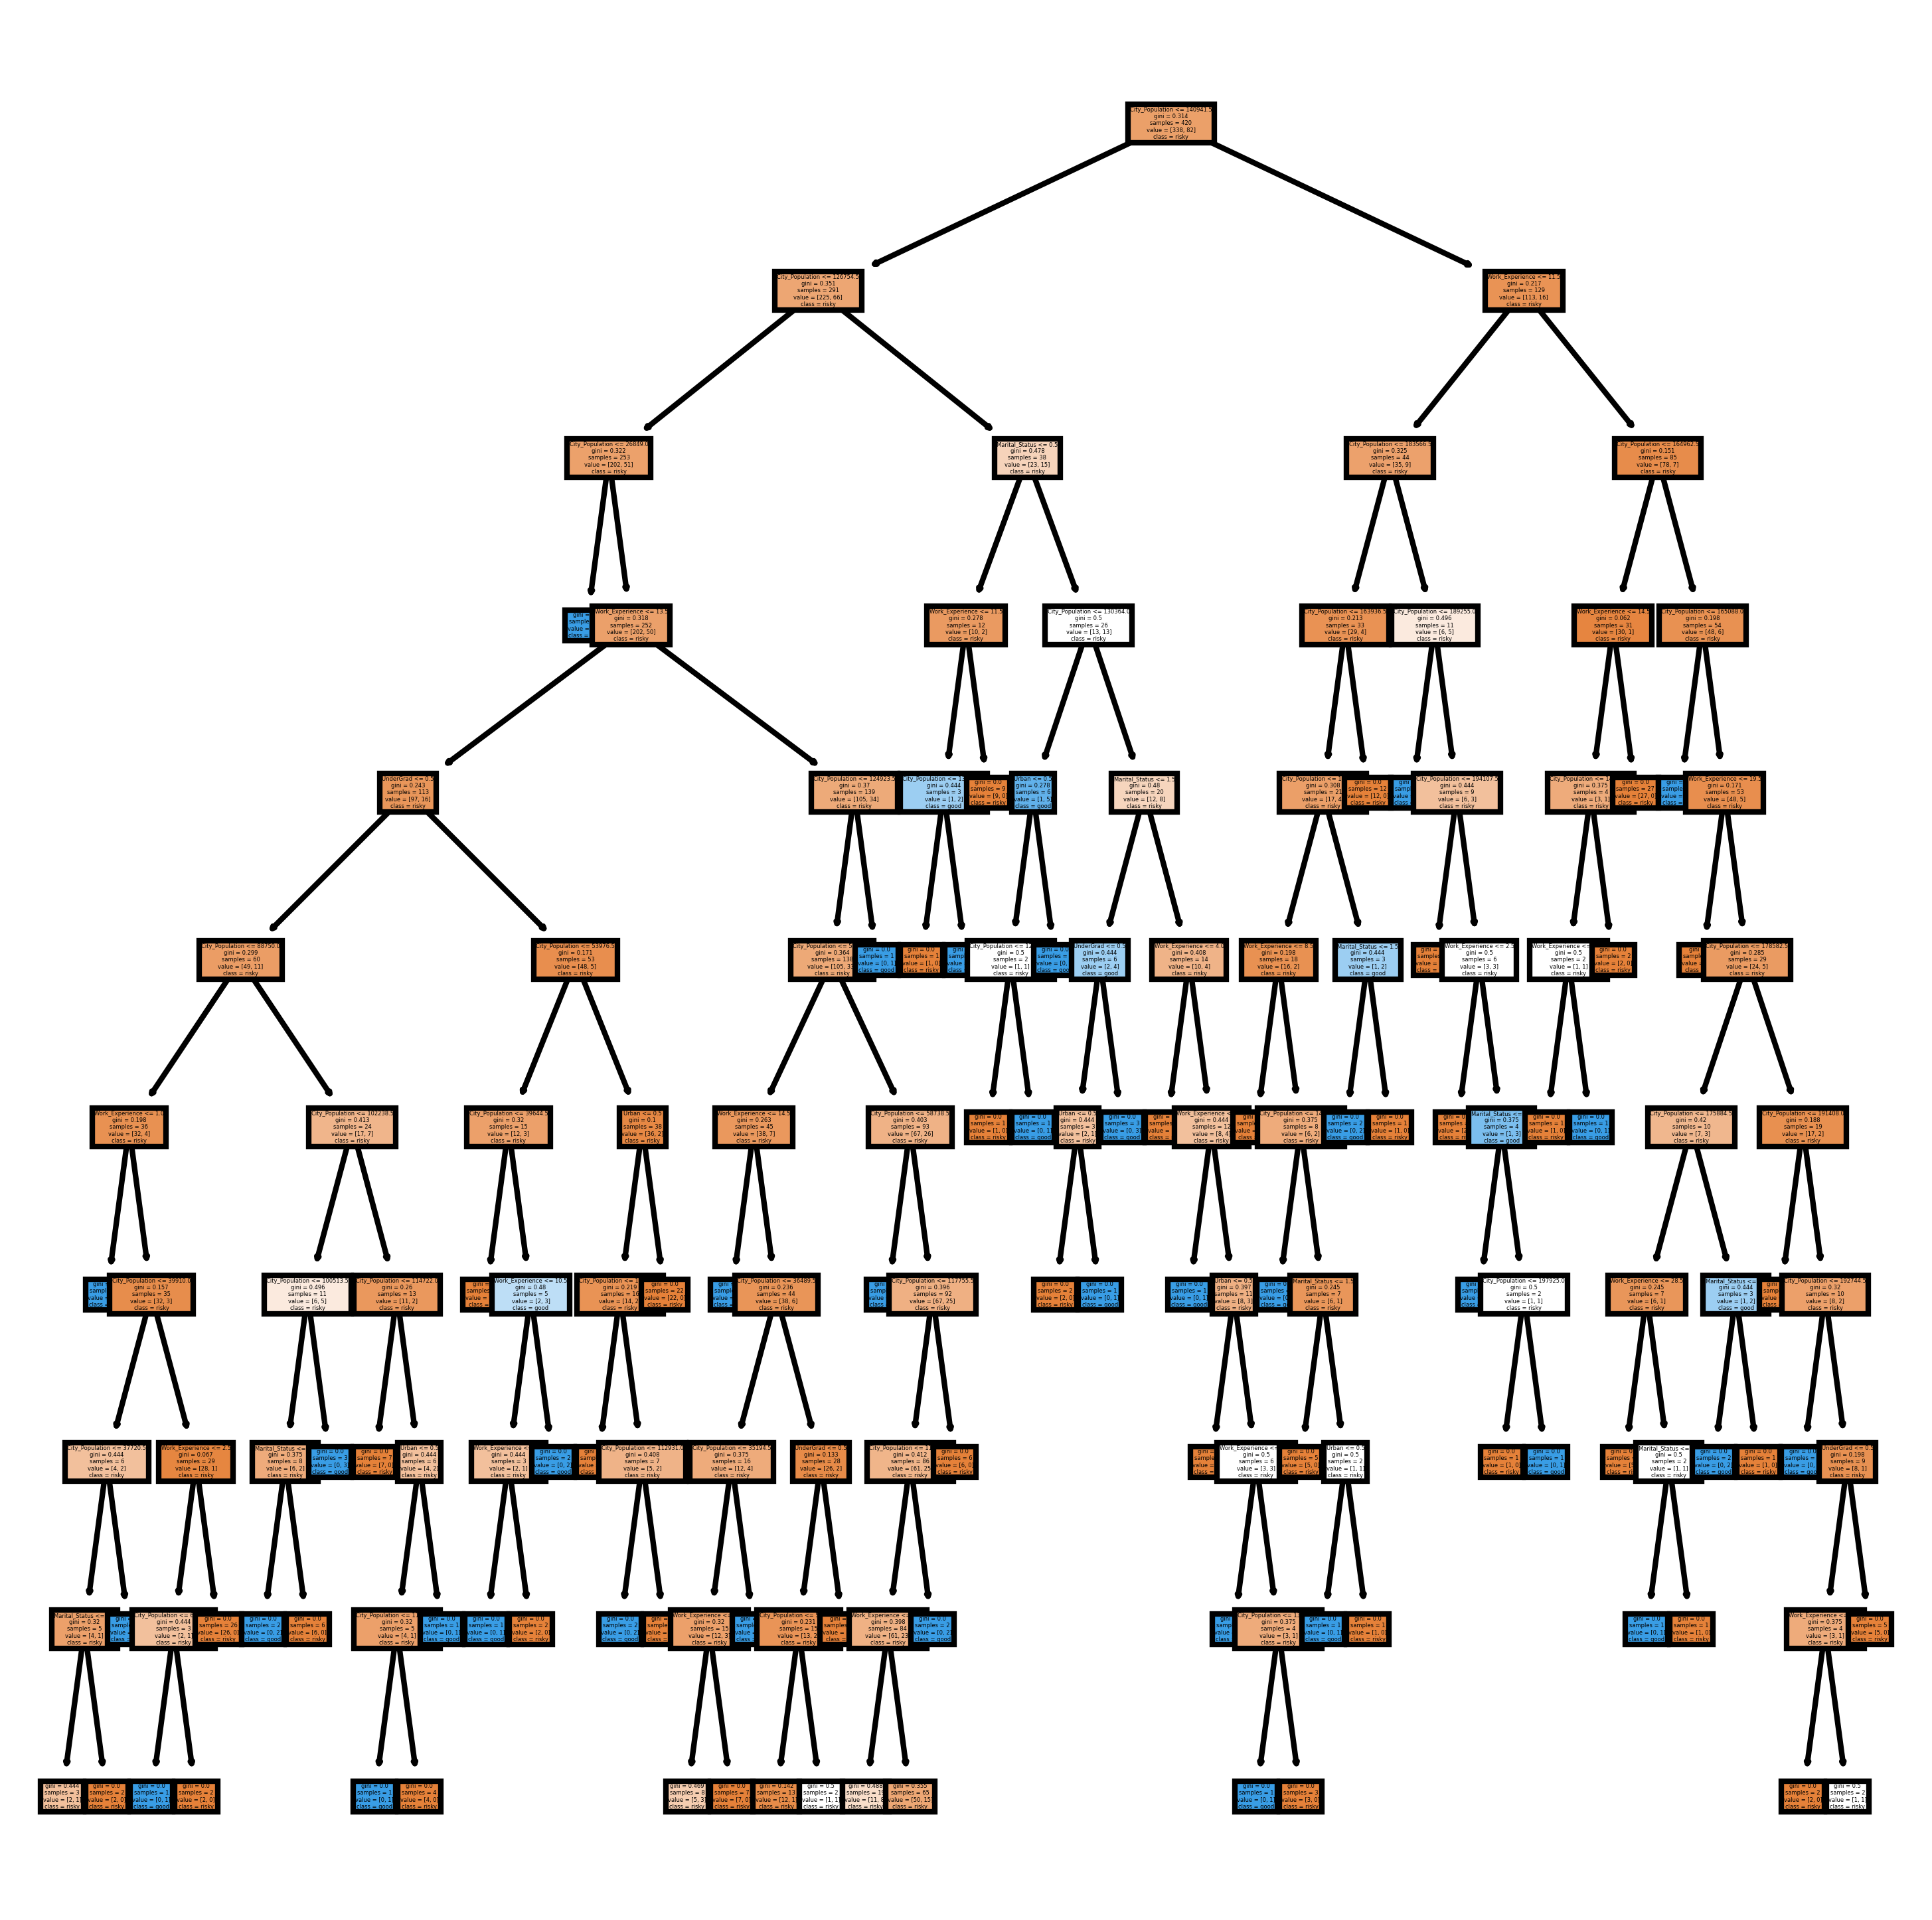

In [ ]:
fn = ['UnderGrad','Marital_Status', 'City_Population','Work_Experience','Urban','Taxable_category']
cn = ['risky','good']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
tree.plot_tree(DT,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier(n_estimators=100,max_samples=0.6,max_features=0.8)
RFC.fit(X_train,Y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)
print('Accuracy score for train is',accuracy_score(Y_train,Y_pred_train))
print('Accuracy score for test is',accuracy_score(Y_test,Y_pred_test))

Accuracy score for train is 0.9416666666666667
Accuracy score for test is 0.7458333333333333


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X = pd.DataFrame(ss_X)
ss_X.columns = list(X)
ss_X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


In [ ]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
loo = LeaveOneOut()
train_error = []
test_error = []
for train_index,test_index in loo.split(df):
  X_train,X_test = ss_X.iloc[train_index],ss_X.iloc[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  RFC.fit(X_train,Y_train)
  Y_pred_train = RFC.predict(X_train)
  Y_pred_test = RFC.predict(X_test)
  train_error.append(accuracy_score(Y_train,Y_pred_train))
  test_error.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy score for train is',np.mean(train_error))
print('Accuracy score for test is',np.mean(test_error))

Accuracy score for train is 0.9462047857540344
Accuracy score for test is 0.76


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)
train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
  X_train,X_test = ss_X.iloc[train_index],ss_X.iloc[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  RFC.fit(X_train,Y_train)
  Y_pred_train = RFC.predict(X_train)
  Y_pred_test  = RFC.predict(X_test)
  train_error.append(accuracy_score(Y_train,Y_pred_train))
  test_error.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy score for train is',np.mean(train_error))
print('Accuracy score for test is',np.mean(test_error))

Accuracy score for train is 0.9400000000000001
Accuracy score for test is 0.7716666666666666


In [ ]:
# Ensemble Methods
# Bagging Classifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
BAC = BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_samples=0.6,max_features=0.7)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
BAC.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.7,
                  max_samples=0.6)

In [ ]:
Y_pred_train = BAC.predict(X_train)
Y_pred_test = BAC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training Accuracy is',accuracy_score(Y_train,Y_pred_train))
print('Test Accuracy is',accuracy_score(Y_test,Y_pred_test))

Training Accuracy is 0.919047619047619
Test Accuracy is 0.7333333333333333


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
params = [{'max_samples':np.arange(0.1,1.5,0.2),'max_features':np.arange(0.1,1.5,0.4)}]
GSV = GridSearchCV(BAC,params,cv=10,scoring='accuracy')
GSV.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.7, max_samples=0.6),
             param_grid=[{'max_features': array([0.1, 0.5, 0.9, 1.3]),
                          'max_samples': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3])}],
             scoring='accuracy')

In [ ]:
print(GSV.best_score_)

0.8071428571428572


In [ ]:
print(GSV.best_params_)

{'max_features': 0.1, 'max_samples': 0.5000000000000001}


In [ ]:
# SEQUENTIAL ENSEMBLE METHODS
# GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.3)
GBC.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.3)

In [ ]:
Y_pred_train = GBC.predict(X_train)
Y_pred_test = GBC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training Accuracy is',accuracy_score(Y_train,Y_pred_train))
print('Test Accuracy is',accuracy_score(Y_test,Y_pred_test))

Training Accuracy is 0.9952380952380953
Test Accuracy is 0.7166666666666667


In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{'learning_rate':np.arange(0.1,1.5,0.3)}]
GSV = GridSearchCV(GBC,params,cv=10,scoring='accuracy')
GSV.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(learning_rate=0.3),
             param_grid=[{'learning_rate': array([0.1, 0.4, 0.7, 1. , 1.3])}],
             scoring='accuracy')

In [ ]:
print(GSV.best_score_)

0.7714285714285714


In [ ]:
print(GSV.best_params_)

{'learning_rate': 0.1}


In [ ]:
# Ada Boosting Ensemble Methods

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(X_train,Y_train)

AdaBoostClassifier()

In [ ]:
Y_pred_train = ABC.predict(X_train)
Y_pred_test = ABC.predict(X_test)

In [ ]:
print('Training accuracy is',accuracy_score(Y_train,Y_pred_train))
print('Test accuracy is',accuracy_score(Y_test,Y_pred_test))

Training accuracy is 0.8238095238095238
Test accuracy is 0.7555555555555555


In [ ]:
from xgboost  import XGBClassifier
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y_train = LE.fit_transform(Y_train)
Y_test = LE.fit_transform(Y_test)
XGB = XGBClassifier(n_estimators = 1500, eta = 10, gamma = 1200, learning_rate = 0.1)
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=10, eval_metric=None,
              feature_types=None, gamma=1200, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
Y_pred_train = XGB.predict(X_train)
Y_pred_test = XGB.predict(X_test)

In [ ]:
print('Training Accuracy is',accuracy_score(Y_train,Y_pred_train))
print('Test Accuracy is',accuracy_score(Y_test,Y_pred_test))

Training Accuracy is 0.8071428571428572
Test Accuracy is 0.7611111111111111
